In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False  

In [2]:
from elastic_query import toktok_elastic

In [3]:
tok_es = toktok_elastic()

## 이야기방 관련 지표

#### 학생별

In [30]:
_cmmnty_id = 'CMMNTY_0000000005402'
_start_date = "2021-11-15" 
_end_date = "2021-12-01"

In [31]:
result = tok_es.comm_index_per_student(_cmmnty_id, _start_date, _end_date)

{'query': {'bool': {'filter': [{'term': {'cmmnty_id': {'value': 'CMMNTY_0000000005402'}}}, {'range': {'post_frst_register_pnttm': {'gte': '2021-11-15T00:00:00.000Z', 'lt': '2021-12-01T00:00:00.000Z'}}}]}}, 'aggs': {'comm_over_date': {'date_histogram': {'field': 'post_frst_register_pnttm', 'interval': 'week'}, 'aggs': {'comm_per_student': {'terms': {'field': 'post_frst_register_id.keyword'}, 'aggs': {'comment': {'value_count': {'field': 'comment_frst_register_pnttm'}}, 'minmax_comment': {'normalize': {'buckets_path': 'comment', 'method': 'rescale_0_1', 'format': '00.00%'}}, 'reply': {'value_count': {'field': 'reply_frst_register_pnttm'}}, 'minmax_reply': {'normalize': {'buckets_path': 'reply', 'method': 'rescale_0_1', 'format': '00.00%'}}, 'good': {'value_count': {'field': 'good_frst_register_pnttm'}}, 'minmax_good': {'normalize': {'buckets_path': 'good', 'method': 'rescale_0_1', 'format': '00.00%'}}, 'comm_index': {'bucket_script': {'buckets_path': {'comment': 'minmax_comment', 'reply'

/Users/sr-pai/opt/anaconda3/envs/python3_tf2/lib/python3.7/site-packages/elasticsearch/connection/base.py:200: ElasticsearchWarning: [interval] on [date_histogram] is deprecated, use [fixed_interval] or [calendar_interval] in the future.
  warnings.warn(message, category=ElasticsearchWarning)


In [32]:
result

{'comm_over_date': {'buckets': [{'key_as_string': '2021-11-15T00:00:00.000Z',
    'key': 1636934400000,
    'doc_count': 115,
    'comm_per_student': {'doc_count_error_upper_bound': 0,
     'sum_other_doc_count': 0,
     'buckets': [{'key': 'aju3423@gne.go.kr',
       'doc_count': 43,
       'comment': {'value': 19},
       'reply': {'value': 2},
       'good': {'value': 22},
       'minmax_comment': {'value': 1.0, 'value_as_string': '100.00%'},
       'minmax_reply': {'value': 0.14285714285714285,
        'value_as_string': '14.29%'},
       'minmax_good': {'value': 1.0, 'value_as_string': '100.00%'},
       'comm_index': {'value': 2.142857142857143}},
      {'key': 'aju3406@gne.go.kr',
       'doc_count': 35,
       'comment': {'value': 12},
       'reply': {'value': 14},
       'good': {'value': 9},
       'minmax_comment': {'value': 0.6111111111111112,
        'value_as_string': '61.11%'},
       'minmax_reply': {'value': 1.0, 'value_as_string': '100.00%'},
       'minmax_good': {'

In [33]:
result_list = []
for bucket in result['comm_over_date']['buckets']:
    res_df = pd.DataFrame(bucket['comm_per_student']['buckets'])
    res_df['date'] = pd.to_datetime(bucket['key_as_string'])
    result_list.append(res_df)
result_df = pd.concat(result_list)

In [34]:
dict_cols = ['comment', 'reply', 'good', 'minmax_comment', 'minmax_reply', 'minmax_good', 'comm_index']
for col in dict_cols:
    result_df[col] = result_df[col].apply(lambda x:x['value'] if type(x) == dict else x)
result_df[['minmax_comment', 'minmax_reply', 'minmax_good']] = result_df[['minmax_comment', 'minmax_reply', 'minmax_good']].fillna(0)
result_df['comm_index'] = result_df['minmax_comment'] + result_df['minmax_reply'] + result_df['minmax_good']

In [35]:
result_df

,key,doc_count,comment,reply,good,minmax_comment,minmax_reply,minmax_good,comm_index,date
0,aju3423@gne.go.kr,43,19,2,22,1.000000,0.142857,1.000000,2.142857,2021-11-15 00:00:00+00:00
1,aju3406@gne.go.kr,35,12,14,9,0.611111,1.000000,0.409091,2.020202,2021-11-15 00:00:00+00:00
2,aju3405@gne.go.kr,16,2,7,7,0.055556,0.500000,0.318182,0.873737,2021-11-15 00:00:00+00:00
3,aju3411@gne.go.kr,10,8,0,2,0.388889,0.000000,0.090909,0.479798,2021-11-15 00:00:00+00:00
4,aju3412@gne.go.kr,5,1,0,4,0.000000,0.000000,0.181818,0.181818,2021-11-15 00:00:00+00:00
5,aju3417@gne.go.kr,4,2,2,0,0.055556,0.142857,0.000000,0.198413,2021-11-15 00:00:00+00:00
6,aju3401@gne.go.kr,2,2,0,0,0.055556,0.000000,0.000000,0.055556,2021-11-15 00:00:00+00:00
0,aju3423@gne.go.kr,43,23,5,15,1.000000,1.000000,1.000000,3.000000,2021-11-22 00:00:00+00:00
1,aju3406@gne.go.kr,9,5,2,2,0.142857,0.400000,0.000000,0.542857,2021-11-22 00:00:00+00:00
2,aju3412@gne.go.kr,8,5,0,3,0.142857,0.000000,0.076923,0.219780,2021-11-22 00:00:00+00:00


In [38]:
#student_id = data['student_post_id'].sample(1).values[0]
student_id = "aju3423@gne.go.kr"
smpl_data = result_df[result_df['key'] == student_id]
min_date = datetime.strftime(smpl_data['date'].min().date(), "%Y-%m-%d")
max_date = datetime.strftime(smpl_data['date'].max().date(), "%Y-%m-%d")
smpl_data

,key,doc_count,comment,reply,good,minmax_comment,minmax_reply,minmax_good,comm_index,date
0,aju3423@gne.go.kr,43,19,2,22,1.0,0.142857,1.0,2.142857,2021-11-15 00:00:00+00:00
0,aju3423@gne.go.kr,43,23,5,15,1.0,1.000000,1.0,3.000000,2021-11-22 00:00:00+00:00
0,aju3423@gne.go.kr,9,3,3,3,0.0,0.000000,0.0,0.000000,2021-11-29 00:00:00+00:00


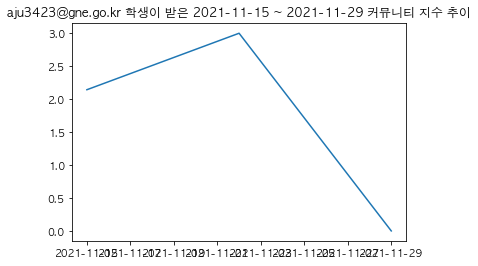

In [39]:
plt.title(f"{student_id} 학생이 받은 {min_date} ~ {max_date} 커뮤니티 지수 추이")
plt.plot(smpl_data['date'], smpl_data['comm_index'])

#### 클래스별

In [10]:
_start_date = "2021-11-15" 
_end_date = "2021-12-01"

In [11]:
result = tok_es.comm_index_per_class(_start_date, _end_date)

{'query': {'bool': {'filter': [{'range': {'post_frst_register_pnttm': {'gte': '2021-11-15T00:00:00.000Z', 'lt': '2021-12-01T00:00:00.000Z'}}}]}}, 'aggs': {'comm_over_date': {'date_histogram': {'field': 'post_frst_register_pnttm', 'interval': 'week'}, 'aggs': {'comm_per_class': {'terms': {'field': 'cmmnty_id'}, 'aggs': {'comment': {'value_count': {'field': 'comment_frst_register_pnttm'}}, 'minmax_comment': {'normalize': {'buckets_path': 'comment', 'method': 'rescale_0_1', 'format': '00.00%'}}, 'reply': {'value_count': {'field': 'reply_frst_register_pnttm'}}, 'minmax_reply': {'normalize': {'buckets_path': 'reply', 'method': 'rescale_0_1', 'format': '00.00%'}}, 'good': {'value_count': {'field': 'good_frst_register_pnttm'}}, 'minmax_good': {'normalize': {'buckets_path': 'good', 'method': 'rescale_0_1', 'format': '00.00%'}}, 'comm_index': {'bucket_script': {'buckets_path': {'comment': 'minmax_comment', 'reply': 'minmax_reply', 'good': 'minmax_good'}, 'script': {'source': 'params.comment + p

/Users/sr-pai/opt/anaconda3/envs/python3_tf2/lib/python3.7/site-packages/elasticsearch/connection/base.py:200: ElasticsearchWarning: [interval] on [date_histogram] is deprecated, use [fixed_interval] or [calendar_interval] in the future.
  warnings.warn(message, category=ElasticsearchWarning)


In [12]:
result_list = []
for bucket in result['comm_over_date']['buckets']:
    res_df = pd.DataFrame(bucket['comm_per_class']['buckets'])
    res_df['date'] = pd.to_datetime(bucket['key_as_string'])
    result_list.append(res_df)
result_df = pd.concat(result_list)

In [13]:
dict_cols = ['comment', 'reply', 'good', 'minmax_comment', 'minmax_reply', 'minmax_good', 'comm_index']
for col in dict_cols:
    result_df[col] = result_df[col].apply(lambda x:x['value'] if type(x) == dict else x)
result_df[['minmax_comment', 'minmax_reply', 'minmax_good']] = result_df[['minmax_comment', 'minmax_reply', 'minmax_good']].fillna(0)
result_df['comm_index'] = result_df['minmax_comment'] + result_df['minmax_reply'] + result_df['minmax_good']

In [14]:
result_df

,key,doc_count,comment,reply,good,minmax_comment,minmax_reply,minmax_good,comm_index,date
0,CMMNTY_0000000005402,115,46,25,44,1.000000,1.000000,0.893617,2.893617,2021-11-15 00:00:00+00:00
1,CMMNTY_0000000006040,100,34,17,49,0.739130,0.680000,1.000000,2.419130,2021-11-15 00:00:00+00:00
2,CMMNTY_0000000005401,34,10,4,20,0.217391,0.160000,0.382979,0.760370,2021-11-15 00:00:00+00:00
3,CMMNTY_0000000006669,32,23,1,8,0.500000,0.040000,0.127660,0.667660,2021-11-15 00:00:00+00:00
4,CMMNTY_0000000004943,19,6,5,8,0.130435,0.200000,0.127660,0.458094,2021-11-15 00:00:00+00:00
5,CMMNTY_0000000004498,18,5,5,8,0.108696,0.200000,0.127660,0.436355,2021-11-15 00:00:00+00:00
6,CMMNTY_0000000002244,16,5,2,9,0.108696,0.080000,0.148936,0.337632,2021-11-15 00:00:00+00:00
7,CMMNTY_0000000002243,13,0,2,11,0.000000,0.080000,0.191489,0.271489,2021-11-15 00:00:00+00:00
8,CMMNTY_0000000005001,11,9,0,2,0.195652,0.000000,0.000000,0.195652,2021-11-15 00:00:00+00:00
9,CMMNTY_0000000006027,10,0,0,10,0.000000,0.000000,0.170213,0.170213,2021-11-15 00:00:00+00:00


In [27]:
#cmmnty_id = data['cmmnty_id'].sample(1).values[0]
cmmnty_id = "CMMNTY_0000000005401"
smpl_data = result_df[result_df['key'] == cmmnty_id]
min_date = datetime.strftime(smpl_data['date'].min().date(), "%Y-%m-%d")
max_date = datetime.strftime(smpl_data['date'].max().date(), "%Y-%m-%d")
smpl_data

,key,doc_count,comment,reply,good,minmax_comment,minmax_reply,minmax_good,comm_index,date
2,CMMNTY_0000000005401,34,10,4,20,0.217391,0.16,0.382979,0.760370,2021-11-15 00:00:00+00:00
7,CMMNTY_0000000005401,10,1,0,9,0.028571,0.00,0.153846,0.182418,2021-11-22 00:00:00+00:00
8,CMMNTY_0000000005401,2,0,0,2,0.000000,0.00,0.058824,0.058824,2021-11-29 00:00:00+00:00


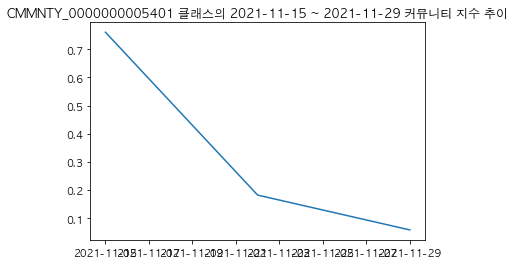

In [28]:
plt.title(f"{cmmnty_id} 클래스의 {min_date} ~ {max_date} 커뮤니티 지수 추이")
plt.plot(smpl_data['date'], smpl_data['comm_index'])

## 과제방 관련 지표

### 과제제출율

In [15]:
_cmmnty_id = 'CMMNTY_0000000000869'
_student_id = 'bbqc8282@gne.go.kr'
_start_date = "2021-11-15" 
_end_date = "2021-12-01"

In [16]:
submit_rate = tok_es.submit_rate_by_student(_cmmnty_id, _student_id, _start_date, _end_date)

{'query': {'bool': {'filter': [{'term': {'cmmnty_id': {'value': 'CMMNTY_0000000000869'}}}, {'term': {'last_updusr_id': {'value': 'bbqc8282@gne.go.kr'}}}, {'range': {'last_updusr_pnttm': {'gte': '2021-11-15T00:00:00.000Z', 'lt': '2021-12-01T00:00:00.000Z'}}}]}}, 'aggs': {'submit_per_student': {'terms': {'field': 'last_updusr_id'}}, 'submit_count': {'value_count': {'field': 'ntt_no'}}}}
5 (ms) 소요
{'query': {'bool': {'filter': [{'term': {'cmmnty_id': {'value': 'CMMNTY_0000000000869'}}}, {'range': {'assignable_end_date': {'gte': '2021-11-15T00:00:00.000Z', 'lt': '2021-12-01T00:00:00.000Z'}}}]}}, 'aggs': {'assign_per_class': {'terms': {'field': 'cmmnty_id'}}, 'assign_count': {'value_count': {'field': 'ntt_no'}}}}
6 (ms) 소요


In [18]:
submit_rate

0.3333333333333333

### 현재 출제된 과제 리스트

In [21]:
assign_list = tok_es.assign_list
assign_list

[{'assignable_start_date': '2021-11-23',
  'cmmnty_nm': '하는반(오봉초 5-2)',
  'stage': 'op',
  'ntcr_nm': '윤태영',
  'site_id': 'SITE_000000000000001',
  'ntt_sj': '11월 3주차 일일임무 정산',
  'bbs_id': 'BBSMSTR_000000003957',
  'assignable_end_date': '2021-11-25',
  'cmmnty_id': 'CMMNTY_0000000000869',
  'semstr_code': '2',
  'ntt_cn': '11월 3주차 일일임무 정산',
  'danwon_nm': '11월 3주차 일일임무 정산',
  'ntt_no': 248157,
  '@timestamp': '2021-12-12T08:33:01.683Z',
  'schul_grade_code': 'SCH_02',
  'subject_code': 'SBJ_01',
  'frst_register_pnttm': '2021-11-23T00:21:51.000Z',
  'sbject_nm': '창의적 체험 활동'},
 {'assignable_start_date': '2021-11-28',
  'cmmnty_nm': '하는반(오봉초 5-2)',
  'stage': 'op',
  'ntcr_nm': '윤태영',
  'site_id': 'SITE_000000000000001',
  'ntt_sj': '토지조사사업 실시 안내',
  'bbs_id': 'BBSMSTR_000000003957',
  'assignable_end_date': '2021-11-29',
  'cmmnty_id': 'CMMNTY_0000000000869',
  'semstr_code': '2',
  'ntt_cn': '메타버스 공간 내 증명제도 확립을 위한 등기신청을 요함\r\n등기신청 양식은 표준 등기양식에 준하여 실시함\r\n기간 내 제도에 맞춘 증명을 증빙하여 소유권을 획득하기

In [23]:
lst_df = []
for hit in assign_list:
    df = pd.DataFrame.from_dict(hit, orient='index').T
    lst_df.append(df)
list_df = pd.concat(lst_df)

In [24]:
list_df

,assignable_start_date,cmmnty_nm,stage,ntcr_nm,site_id,ntt_sj,bbs_id,assignable_end_date,cmmnty_id,semstr_code,ntt_cn,danwon_nm,ntt_no,@timestamp,schul_grade_code,subject_code,frst_register_pnttm,sbject_nm
0,2021-11-23,하는반(오봉초 5-2),op,윤태영,SITE_000000000000001,11월 3주차 일일임무 정산,BBSMSTR_000000003957,2021-11-25,CMMNTY_0000000000869,2,11월 3주차 일일임무 정산,11월 3주차 일일임무 정산,248157,2021-12-12T08:33:01.683Z,SCH_02,SBJ_01,2021-11-23T00:21:51.000Z,창의적 체험 활동
0,2021-11-28,하는반(오봉초 5-2),op,윤태영,SITE_000000000000001,토지조사사업 실시 안내,BBSMSTR_000000003957,2021-11-29,CMMNTY_0000000000869,2,메타버스 공간 내 증명제도 확립을 위한 등기신청을 요함\r\n등기신청 양식은 표준 ...,3. 민족 문화를 지켜 나간 조선,258609,2021-12-12T08:33:01.703Z,SCH_02,SBJ_01,2021-11-29T15:47:46.000Z,사회
0,2021-11-29,하는반(오봉초 5-2),op,윤태영,SITE_000000000000001,11월 4주차 일일임무 정산,BBSMSTR_000000003957,2021-11-30,CMMNTY_0000000000869,공통,11월 4주차 일일임무 정산. 모든 정산 내용을 적어주세요.,일일임무 정산,256469,2021-12-12T08:33:01.699Z,SCH_02,SBJ_01,2021-11-28T23:56:38.000Z,창의적 체험 활동
0,2021-11-29,하는반(오봉초 5-2),op,윤태영,SITE_000000000000001,11월 4주차 일일임무(기후천사단 부분) 정산,BBSMSTR_000000003957,2021-11-30,CMMNTY_0000000000869,공통,11월 4주차 일일임무(기후천사단 부분) 정산,일일임무 정산,256474,2021-12-12T08:33:01.699Z,SCH_02,SBJ_01,2021-11-28T23:57:23.000Z,창의적 체험 활동
0,2021-11-07,하는반(오봉초 5-2),op,윤태영,SITE_000000000000001,100대 실천과제 실천 사례를 알려주세요(이전 활동 포함),BBSMSTR_000000003957,2021-11-18,CMMNTY_0000000000869,공통,100대 실천과제 실천 사례를 알려주세요(이전 활동 포함) 뱃지 배부 예정입니다.,100대 실천과제,231996,2021-12-12T08:33:01.610Z,SCH_02,SBJ_01,2021-11-12T00:27:19.000Z,창의적 체험 활동
0,2021-11-23,하는반(오봉초 5-2),op,윤태영,SITE_000000000000001,11월 3주차 일일임무(기후천사단 부분) 정산,BBSMSTR_000000003957,2021-11-25,CMMNTY_0000000000869,2,11월 3주차 일일임무(기후천사단 부분) 정산,11월 3주차 일일임무(기후천사단 부분) 정산,248202,2021-12-12T08:33:01.684Z,SCH_02,SBJ_01,2021-11-23T00:27:42.000Z,창의적 체험 활동
